# Dataset preprocessing and analysis

In [1]:
import os
import pickle

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from wordcloud import WordCloud, STOPWORDS

from sarcsdet.utils.count_metrics import (
    get_ngrams,
    count_ngrams,
    n_common_ngrams, 
    count_metrics,
    create_metrics_df
)
from sarcsdet.utils.preprocess_data import Preprocessor

### Get data

In [2]:
data_path = '../data/Quotes'

In [3]:
with open(os.path.join(data_path, 'result.pickle'), 'rb') as f:
    df = shuffle(pickle.load(f))

In [4]:
df.head()

,quote,tags,rating,rating_positive,rating_negative,submitted_by,submitted_date,comments_count,author,character,is_dialog,target,source
126325,"Когда мы умрём, ничего не останется, кроме наш...",[любовь],1,2,1,Оля Димитрова,2010-05-21 21:45:00,0,[],[],0,0,None
378956,"— Может, я и впрямь слегка не в себе? — Да ты ...",[сумасшествие],6,10,4,MiKroshka,2013-07-17 14:01:00,0,[],"[Бендер, Туранга Лила]",1,0,Футурама
114,"(читается во время космических путешествий) О,...",[],0,0,0,Lyku,2020-12-05 13:27:00,0,[],[],0,0,None
167377,"Мы можем втеснять нашу волю только тому, что с...",[философия],None,None,None,None,None,None,[Александр Иванович Герцен],[],0,0,None
196662,"Неуютный, холодный, жестокий и лживый мир, на ...","[отношения, люди, мир (мироздание)]",None,None,None,None,None,None,[Феликс Хвалибуг],[],0,0,None


In [5]:
df.shape[0]

401067

In [6]:
df[df.target == 1].shape[0]

27706

### Text tokenization

In [7]:
preprocessor = Preprocessor('ru')

[nltk_data] Downloading package stopwords to /home/kate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['quote_tokenized'] = df.quote.apply(preprocessor.preprocess_text)

In [9]:
df = df[df['quote_tokenized'].apply(lambda x: len(x) > 10)]

### Unigrams

In [10]:
unigrams = count_ngrams(df, 'quote_tokenized', 1)
n_common_ngrams(15, unigrams)

[(('это',), 88400),
 (('человек',), 63263),
 (('мочь',), 38735),
 (('свой',), 38511),
 (('жизнь',), 38224),
 (('весь',), 37976),
 (('который',), 35117),
 (('знать',), 27830),
 (('хотеть',), 21957),
 (('любовь',), 21590),
 (('любить',), 20878),
 (('мир',), 19362),
 (('самый',), 18551),
 (('твой',), 18515),
 (('становиться',), 17909)]

In [11]:
len(unigrams.keys())

92450

### Bigrams

In [12]:
bigrams = count_ngrams(df, 'quote_tokenized', 2)
common_bigrams = n_common_ngrams(15, bigrams)
common_bigrams

[(('человек', 'который'), 4896),
 (('друг', 'друг'), 4510),
 (('самый', 'дело'), 2487),
 (('весь', 'жизнь'), 2263),
 (('свой', 'жизнь'), 2098),
 (('жизнь', 'это'), 1643),
 (('каждый', 'день'), 1503),
 (('весь', 'время'), 1492),
 (('весь', 'это'), 1458),
 (('человек', 'мочь'), 1446),
 (('любовь', 'это'), 1341),
 (('знать', 'это'), 1300),
 (('весь', 'мир'), 1290),
 (('это', 'значить'), 1272),
 (('человек', 'это'), 1266)]

In [13]:
len(bigrams.keys())

2167013

### Trigrams

In [14]:
trigrams = count_ngrams(df, 'quote_tokenized', 3)
n_common_ngrams(15, trigrams)

[(('человек', 'который', 'любить'), 283),
 (('весь', 'свой', 'жизнь'), 270),
 (('любить', 'друг', 'друг'), 264),
 (('это', 'человек', 'который'), 226),
 (('изо', 'весь', 'сила'), 172),
 (('человек', 'который', 'мочь'), 161),
 (('человек', 'который', 'знать'), 147),
 (('понимать', 'друг', 'друг'), 132),
 (('самый', 'дело', 'это'), 129),
 (('друг', 'друг', 'это'), 118),
 (('весь', 'наш', 'жизнь'), 105),
 (('человек', 'который', 'хотеть'), 99),
 (('жить', 'свой', 'жизнь'), 91),
 (('жизнь', 'слишком', 'короткий'), 89),
 (('женщина', 'который', 'любить'), 88)]

In [15]:
len(trigrams.keys())

3395701

### PMI, T-score, Dice for bigrams

In [16]:
create_metrics_df(df, 'quote_tokenized', common_bigrams)

,collocation,frequency,MI,T-score,Dice,LogLikelyHood
0,"(человек, который)",4896,0.235610,10.542884,0.118589,2307.092397
1,"(друг, друг)",4510,4.136894,63.339209,0.445432,37314.784216
2,"(самый, дело)",2487,2.918722,43.274826,0.208755,14517.722130
3,"(весь, жизнь)",2263,-0.007050,-0.233024,0.074837,-31.907029
4,"(свой, жизнь)",2098,-0.307261,-10.871853,0.064479,-1289.267293
5,"(жизнь, это)",1643,-1.768615,-97.576049,0.030440,-5811.670335
6,"(каждый, день)",1503,2.490926,31.871926,0.145168,7487.722198
7,"(весь, время)",1492,0.462005,10.584549,0.065133,1378.624104
8,"(весь, это)",1458,-2.154897,-131.862642,0.025937,-6283.680299
9,"(человек, мочь)",1446,-1.469313,-67.264710,0.035582,-4249.252100


## Data visualization

In [17]:
wordcloud = WordCloud(
    background_color='black', 
    stopwords = STOPWORDS,
    max_words = 200, 
    max_font_size = 100,
    width=800, 
    height=400
)

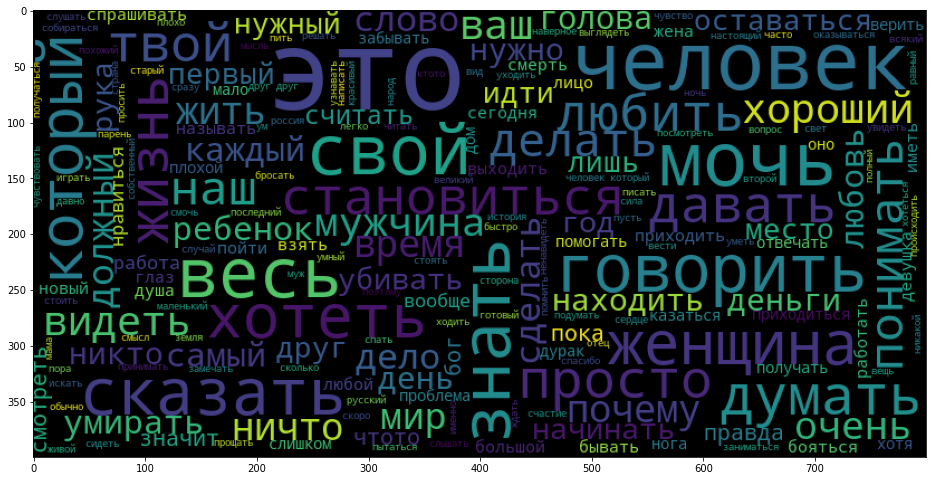

In [18]:
plt.figure(figsize=(16, 12))
wordcloud.generate(
    ' '.join([s for s in df.loc[df['target'] == 1, 'quote_tokenized'].values if isinstance(s, str)])
)
plt.imshow(wordcloud);

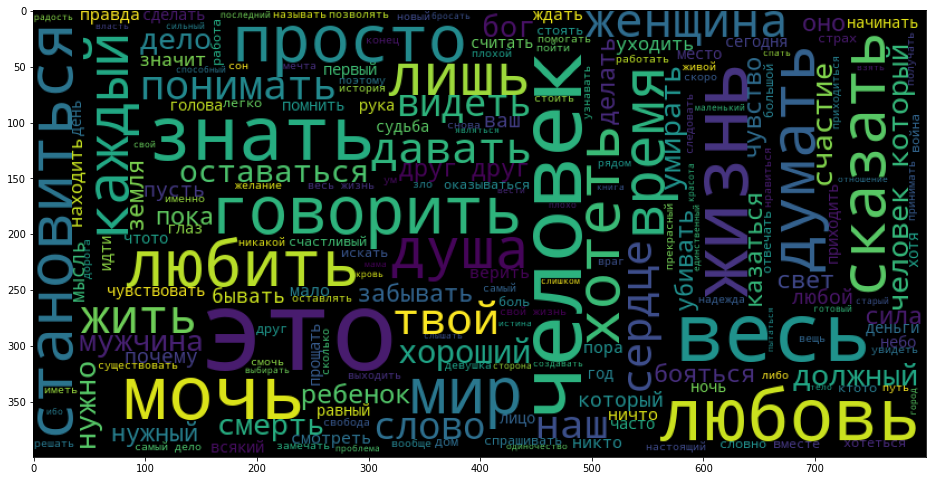

In [19]:
plt.figure(figsize=(16, 12))
wordcloud.generate(
    ' '.join([s for s in df.loc[df['target'] == 0, 'quote_tokenized'].values if isinstance(s, str)])
)
plt.imshow(wordcloud);

### Save pickle

In [20]:
with open(os.path.join(data_path, 'quote_tokenized.pickle'), 'wb') as f:
    pickle.dump(df, f)